# Euler modificado y mejorado

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import pdb

## Graficar

In [2]:
def graficar(x_values, y_values):
    plt.plot(x_values, y_values,label='Euler modificado')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Solving ODE using Euler's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

## Euler simple

In [3]:
def euler_simp_p(f, xi, yi):
    p = f(xi, yi)
    return p

## Euler modificado

In [4]:
def euler_modif_p(f, x, y, hA):
    ymit = y + euler_simp_p(f,x,y) * hA/2
    pendienteMitad = f(x+(hA/2), ymit)
    return pendienteMitad

## Euler modificado para k2

In [5]:
def euler_modif_p_k2(f, x, y, hA):
    ymit2 = y + euler_modif_p(f,x,y,hA) * hA/2  # igual es: y + k1  * h/2
    pendienteMitad2 = f(x+(hA/2), ymit2)
    return pendienteMitad2

## Extra para k3

In [6]:
def para_k3(f,x,y,hA):
    pend = f(x + hA/2 , y + euler_modif_p_k2(f,x,y,hA) * hA)
    return pend

## Euler Mejorado (no se usa)

In [7]:
def euler_mej_p(f,x,y,h):
    pend1 = f(x,y)
    ysig = y + pend1 * h
    pend2 = f(x+h,ysig)
    pendProm = (pend1+pend2)/2
    return pendProm

## Runge-Kutta

In [8]:
def runge_kutta(f,x,y,hA):
    k0 = euler_simp_p(f,x,y)
    k1 = euler_modif_p(f,x,y,hA)
    k2 = euler_modif_p_k2(f,x,y,hA)
    k3 = para_k3(f,x,y,hA)
    resultado = y + (hA/6) * (k0 + 2*k1 + 2*k2 + k3)
    return resultado

## Obtener Valores (for no error)

In [41]:
def obtenerValores(f,x0,y0,h,n,tol,hLista):
    x_values = np.zeros(n+1);
    y_values = np.zeros(n+1);
    x_values[0]=x0
    y_values[0]=y0
    hAj = h
    error = 10 #inicial
    
    for i in range(1,n+1): 
        while (error > tol):
            hAj = hAj * 2
            y1 = runge_kutta(f,x_values[i-1], y_values[i-1],hAj)
            ymit = runge_kutta(f,x_values[i-1], y_values[i-1],hAj/2)
            y2 = runge_kutta(f,x_values[i-1]+h/2,ymit,hAj/2)
            error = np.abs(y2-y1)
            if (error > tol):
                hAj = hAj / 4  #como despues se multiplica por 2 (por eso el /4 en vez de /2)
            
        x_values[i] = x_values[i-1] + hAj
        y_values[i] = (16*y2 - y1)/15   #aun no al 100 la formula pero ya vi que si tiene a eso un ejemplo! Ya vi como si se puede eso de quitar error por saber comp!
        error = 10
        hLista.append(hAj)
        #if(x_values[i] > xf):
            #break
        
    return x_values,y_values

## Runge-Kutta (Main)

[0.02, 0.04, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.08, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.16, 0.1

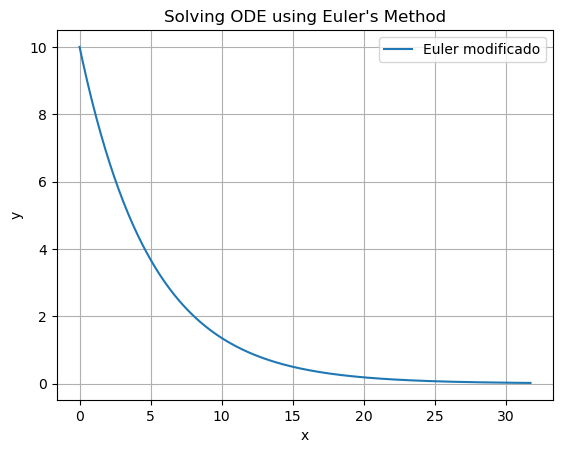

In [43]:
#Valores - Parametros - Condiciones
x0 = 0
y0 = 10
k = .2   #func de superficie de contacto, litros en la alberca, prop del material, interac igual si viento otra cosa dif no?
h = .01   #valor provisional que realmente va creciendo hasta que llega al limite que lo logra (cumplir condicion del error), o decrece si no lo esta logrando
n = 200   #Las iteraciones que sean 
tol = .000000001
#xf = 20   #Para hacerlo de intervalo fijo, necesito hacer listas para que justo cantidad de elem que si, y luego lo pase a arreglo (al menos asi se me ocurre)
hLista = []

#Funcion
def f(x, y):
    return -k * y

# Resolver
x_values, y_values = obtenerValores(f, x0, y0, h, n, tol, hLista)

print(hLista)
# Plot the solution
#label = 'ODE Euler Modificado'
graficar(x_values, y_values)

## Grafica y Analisis del error (mej)

In [35]:
meanAbsoluteErrorList = []   #solo correrlo al inicio

In [36]:
def valorDeFuncion(x,k):
    valor = 10*math.exp(-k*x)
    return valor

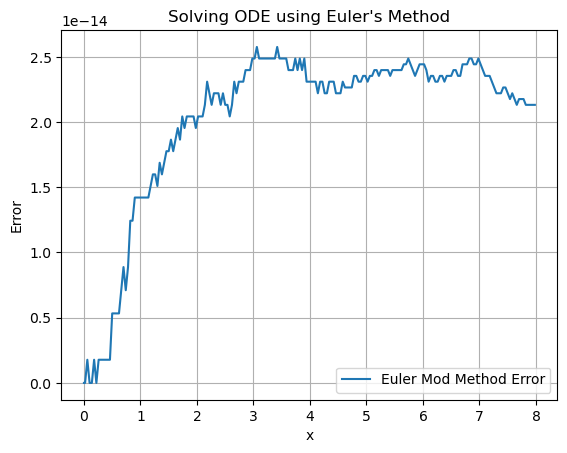

In [37]:
#Grafica del error en func de x
k =.2
listRealValues = []
listErrors = []
for i in range (0,n+1):
    #print(x_values[i])
    #print(y_values[i])
    valorReal = valorDeFuncion(x_values[i],k)
    listRealValues.append(valorReal)
    listErrors.append(valorReal-y_values[i])
#print(listRealValues)
arrayRealValues = np.array(listRealValues)
#print(arrayRealValues)
arrayErrorValues = np.array(listErrors)
#print(arrayErrorValues)

# Plot the solution
plt.plot(x_values, arrayErrorValues, label='Euler Mod Method Error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title("Solving ODE using Euler's Method")
plt.legend()
plt.grid(True)
plt.show()

#Mean Absolute Error
meanAbsoluteError = np.mean(np.abs(arrayErrorValues))
meanAbsoluteErrorList.append(meanAbsoluteError)



In [38]:
print(meanAbsoluteErrorList)
print(x_values[200])

[2.0253561127838426e-14]
7.980000000000006


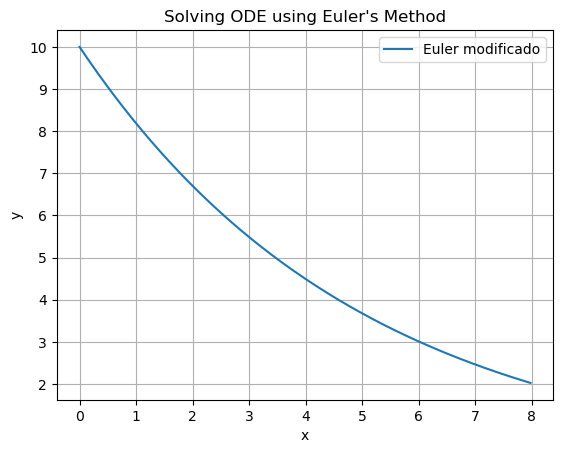

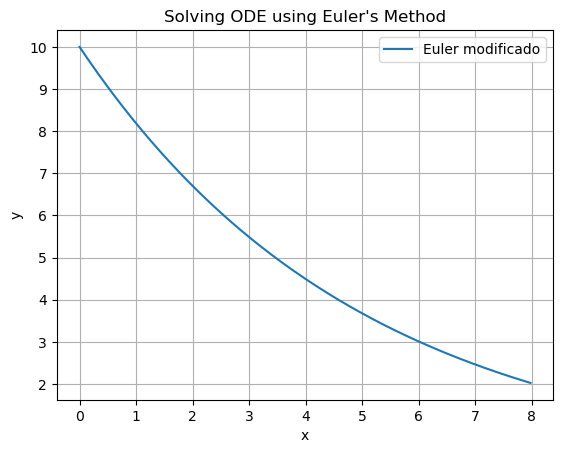

In [39]:
graficar(x_values, y_values)
graficar(x_values, arrayRealValues)